$\DeclareMathOperator*{\argmin}{arg\,min}$
$\DeclareMathOperator*{\argmax}{arg\,max}$
$\newcommand{\norm}[1]{\lvert \lvert #1 \rvert \rvert}$

# <center>Principal Component Analysis</center>
### <center>_Calvin Chi_</center>

## I. Introduction
Principle component analysis (PCA) is a dimensionality reduction technique. Given samples $x^{(1)}, \dots ,x^{(m)}$ where $x^{(i)} \in \mathbb{R}^{n}$, PCA can find $\tilde{x}^{(1)}, \cdots ,\tilde{x}^{(m)}$ such that $\tilde{x}^{(i)} \in \mathbb{R}^{k}$ for $k < n$. PCA does so by projecting $x^{(1)}, \dots ,x^{(m)}$ onto a $k$-dimensional subspace that preserves variability among the samples. Specifically, PCA finds for the first dimension a vector for which the projected $m$ points have the maximum variance. Another vector is found for the second dimension as the vector for which the projected $m$ points have the second maximum variance. In this fashion, PCA finds a total of $k$ vectors onto which the samples can be projected to.

Alternatively and equivalently, PCA can be understood as finding $k$ successive least squares projection vectors for samples $x^{(1)}, \dots ,x^{(m)}$ onto a line. We will establish the equivalence between the two perspectives.  

## II. Maximum Variance Projection
Let us start with the problem of solving for a vector $u: || u ||_{2} = 1$ for $x^{(1)}, \dots ,x^{(m)}$ to project to such that that the projections have maximum variance. The projection of $x$ onto $u$ is given by the projection equation

$$proj_{u}x = \frac{x^{T}u}{||u||_{2}} = u^{T}x$$

The mean of the projections is $u^{T}\hat{x}$, where $\hat{x} = \frac{1}{m}\sum_{i}x^{(i)}$. From definition of variance

$$
\begin{align*}
\sigma^{2} &= \frac{1}{m}\sum_{i = 1}^{m}\left[u^{T}(x_{i} - \hat{x})\right]^{2}\\
&= \frac{1}{m}\sum_{i = 1}^{m}u^{T}(x_{i} - \hat{x})(x_{i} - \hat{x})^{T}u\\
&= u^{T}\left[\frac{1}{m}\sum_{i = 1}^{m}(x_{i} - \hat{x})(x_{i} - \hat{x})^{T}\right]u\\
&= \frac{1}{m}u^{T}Cu
\end{align*}
$$

where $C \in \mathbb{R}^{n \times n}$ is the covariance matrix of features of $x \in \mathbb{R}^{n}$. Now we enter the task of solving for $u$ such that the variance $\sigma^{2}$ is maximized. Since $C = C^{T}$, we can apply eigendecomposition to solve for $u$.

$$
\begin{align*}
\max_{u: ||u||_{2} = 1}u^{T}Cu &= \max_{u: ||u||_{2} = 1}u^{T}UDU^{T}u\\
&= \max_{w: ||w||_{2} = 1}w^{T}Dw\\
&= \max_{w: ||w||_{2} = 1}\lambda_{i}w_{i}^{2}\\
\end{align*}
$$

where $\lambda_{i}$ is the $ii$th entry of diagonal matrix $D \in \mathbb{R}^{n \times n}$. The solution is $w^{*} = e_{1}$, which is a vector of zeros except with a 1 in the first entry. This implies that $u^{*} = U^{T}w^{*} = u_{1}$, the first eigenvector of $C$. The maximum objective value for $\sigma^{2}$ is then $\lambda_{1}$, the largest eigenvalue of $C$. It follows that the successive projection vectors that gives the next largest variance of projection is $u_{2}, \dots ,u_{k}$. 

## III. Least Squares  Projection
Now we discuss a different, but equivalent perspective of PCA. Given $x^{(1)}, \dots ,x^{(m)} \in \mathbb{R}^{n}$, PCA seeks to find a line such that the sum of squared distances from the points to the line is minimized. 

$$
\begin{align*}
\mathcal{L}(x_{0}, u) = \{x_{0} + tu \: : \: t \in \mathbb{R}^{n}\}
\end{align*}
$$

where $x_{0}$ and $u \in \mathbb{R}^{n}$ with $||u||_{2} = 1$ is to be solved. Given any $u : ||u||_{2} = 1$, $x_{0}$, $t$ can be solved that minimizes the distance. 

$$
\begin{align*}
\argmin_{t}\norm{x_{0} + ut - x}_{2} &= \argmin_{t}\norm{x_{0} + ut - x}_{2}^{2}\\
&= \argmin_{t}[(x_{0} - x) + ut]^{T}[(x_{0} - x) + ut]\\
&= \argmin_{t}(x_{0} - x)^{T}(x_{0} - x) + 2t(x_{0} - x)^{T}u + t^{2}u^{T}u\\
&\Rightarrow 2(x_{0} - x)^{T}u + 2t = 0\\
&\Rightarrow t^{*} = u^{T}(x - x_{0})
\end{align*}
$$

Substituting $t^{*}$, and noting that $\norm{x_{0} + ut - x}_{2} = \norm{x - ut - x_{0}}_{2}$, we get

$$
\begin{align*}
D(x, \mathcal{L}(x_{0}, u)) &= \norm{(x - x_{0})^{T}(I_{n} - uu^{T})}_{2}\\
&= \norm{(x - x_{0})^{T}P(u)}_{2}\\
&\Rightarrow D(x, \mathcal{L}(x_{0}, u))^{2} = [P(u)(x - x_{0})]^{T}[P(u)(x - x_{0})]\\
&= (x - x_{0})^{T}P(u)P(u)(x - x_{0})\\
&= (x - x_{0})^{T}P(u)(x - x_{0})
\end{align*}
$$

where the last equality comes from $P(u)$ being idempotent. The problem of minimizing the sum of squared differences is now

$$
\begin{align*}
&\min_{u:\norm{u}_{2} = 1, x_{0}}\sum_{i = 1}^{m}D(x^{(i)}, \mathcal{L}(x_{0}, u))^{2}\\
&= \min_{u:\norm{u}_{2} = 1, x_{0}}\sum_{i = 1}^{m}(x^{(i)} - x_{0})^{T}P(u)(x^{(i)} - x_{0})\\
&\Rightarrow \sum_{i = 1}^{m}-2P(u)(x^{(i)} - x_{0}) = 0\\
&\Rightarrow mP(u)(\hat{x} - x_{0}) = 0\\
\end{align*}
$$

where $\hat{x} = \frac{1}{m}\sum_{i}x^{(i)}$. From the last expression to equal 0, $x_{0} = \hat{x}$. Substituting optimal $x_{0}^{*}$, our least squares problem now becomes

$$
\begin{align*}
&\min_{u:\norm{u}_{2} = 1}\sum_{i = 1}^{m}(x^{(i)} - \hat{x})^{T}P(u)(x^{(i)} - \hat{x})\\
&= \min_{u:\norm{u}_{2} = 1}\sum_{i = 1}^{m}(x^{(i)} - \hat{x})^{T}(x^{(i)} - \hat{x}) - (x^{(i)} - \hat{x})^{T}uu^{T}(x^{(i)} - \hat{x})\\
&= \min_{u:\norm{u}_{2} = 1}\sum_{i = 1}^{m}-u(x^{(i)} - \hat{x})(x^{(i)} - \hat{x})^{T}u\\
&= \max_{u:\norm{u}_{2} = 1}u\left(\sum_{i = 1}^{m}(x^{(i)} - \hat{x})(x^{(i)} - \hat{x})^{T}\right)u^{T}\\
&\Rightarrow \argmax_{u:\norm{u}_{2} = 1}u^{T}Cu
\end{align*}
$$

which becomes the same problem as variance maximization. 

## IV. Implementation
We discuss two common ways to perform PCA dimensionality reduction to the dataset $X \in \mathbb{R}^{m \times n}$, where $m$ is the number of samples and $n$ is the number of features. For convenience each sample in $X$ has already been centered. We now discuss how to use singular value composition (SVD) on $\tilde{X}$ to perform PCA. From defintion, we have

$$
\begin{align*}
mC = X^{T}X = VS^{2}V^{T}
\end{align*}
$$

From section II, we saw that the first projection vector is $v_{1} \in \mathbb{R}^{n \times n}$, which we now refer to as the first principal component. The factor $m$ does not affect the solution. Since $\norm{v_{1}}_{2} = 1$, $Xv_{1}$ gives the projection of $m$ samples onto $v_{1}$. 

We observe that the projection can equivalently be rewritten 

$$
\begin{align*}
XV = USV^{T}V = US
\end{align*}
$$

Hence, once SVD on $X$ has been performed, we can perform PCA dimensionality reduction to get $\tilde{X} \in \mathbb{R}^{m \times k}$ for $k < n$ by the following methods

1. $\tilde{X} = X\tilde{V}$, where $V \in \mathbb{R}^{n \times k}$
2. $\tilde{X} = \tilde{U}\tilde{S}$, where $\tilde{U} \in \mathbb{R}^{m \times k}$ and $\tilde{S} \in \mathbb{R}^{k \times k}$

Note that the square of the singular values in $S$ from SVD on $\frac{1}{m}X^{T}X$ is equal to the variance of the projections. The same logic can be applied to dimensionality reduction for feature vectors rather than sample vectors to result in $\tilde{X^{T}} = X^{T}\tilde{U} = \tilde{V}\tilde{S}$. Below are code that show the equivalence of the above two implementations. We will work with $X \in \mathbb{R}^{5 \times 2}$ and reduce its dimension to 1.

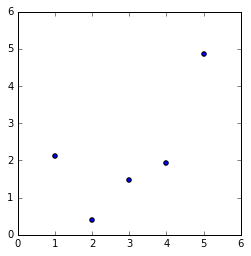

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

noise = np.random.normal(0, 1, 5)
X = np.array([[1, 0.5 + noise[0]], [2, 1 + noise[1]], [3, 2 + noise[2]], [4, 3 + noise[3]], [5, 4 + noise[4]]])

plt.scatter(X[:, 0], X[:, 1])
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [49]:
X_c = X - np.reshape(X.mean(axis=1), (5, 1))
U, S, V = np.linalg.svd(X_c)
S = np.diag(S)

# Method 1
X1 = X_c.dot(V[0, :].T)

# Method 2
X2 = U[:, 0].dot(S[0, 0])

print("Method 1")
print(X1)
print("Method 2")
print(X2)

Method 1
[-0.79503223  1.13968389  1.08058061  1.46581017  0.09517118]
Method 2
[-0.79503223  1.13968389  1.08058061  1.46581017  0.09517118]


## V. Low Rank Approximation
PCA can be used to solve the low rank approximation problem of the form

$$
\begin{align*}
\min_{L, R}\norm{X - LR^{T}}_{F}
\end{align*}
$$

where $X \in \mathbb{R}^{n \times m}$ and $L \in \mathbb{R}^{n \times k}$ and $R \in \mathbb{R}^{m \times k}$. The solution involves the SVD

$$
\begin{align*}
L =
\begin{bmatrix}
u_{1} \cdots u_{k}
\end{bmatrix}
\begin{bmatrix}
\sigma_{1} & &\\
 & \ddots &\\
 & & \sigma_{k}\\
\end{bmatrix}
\quad
R = 
\begin{bmatrix}
v_{1}^{T}\\
\vdots\\
v_{k}^{T}\\
\end{bmatrix}
\end{align*}
$$

The proof that SVD yields the best low rank approximation is outside the scope of this note and can be found elsewhere. If we have the reduced dimension representation of samples and features, where $samples = \tilde{U}\tilde{S} \in \mathbb{R}^{m \times k}$ and $features^{T} = \tilde{S}\tilde{V}^{T} \in \mathbb{R}^{k \times n}$, then reconstruction of the original matrix $X \in \mathbb{R}^{m \times n}$ can be done via

$$
\begin{align*}
X \approx samples \: \tilde{S}^{-1} features^{T} = \tilde{U}\tilde{S}\tilde{V}^{T}
\end{align*}
$$

To illustrate

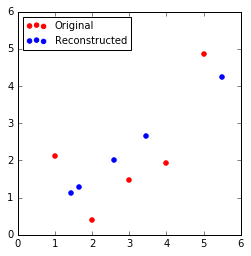

In [88]:
Sinv = 1 / S[0, 0]

samples = np.reshape(U[:, 0].dot(S[0, 0]), (5, 1))
features = np.reshape(V[0, :].T.dot(S[0, 0]), (2, 1))

X_tilde = samples * Sinv * features.T
#X_tilde = X_tilde + np.reshape(X.mean(axis = 1), (5, 1))

fig, ax = plt.subplots()
p1 = plt.scatter(X[:, 0], X[:, 1], color='red')
p2 = plt.scatter(X_tilde[:, 0], X_tilde[:, 1], color='blue')
plt.legend([p1, p2], ["Original", "Reconstructed"], loc='upper left')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

And the reconstruction of $X$ almost perfectly overlaps with $X$. Alternatively, the $X$ low rank approximation could be performed much more straightfowardly via SVD

$$X \approx \tilde{U}\tilde{S}\tilde{V}^T$$

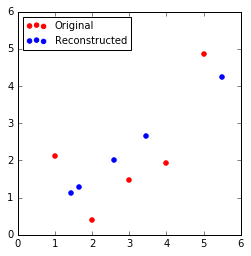

In [142]:
U, S, V = np.linalg.svd(X)

S = np.diag(S)
U_tilde = np.reshape(U[:, 0], (5, 1))
V_tilde = np.reshape(V[0, :], (1, 2))

X_tilde = U_tilde.dot(S[0, 0]).dot(V_tilde)

fig, ax = plt.subplots()
p1 = plt.scatter(X[:, 0], X[:, 1], color='red')
p2 = plt.scatter(X_tilde[:, 0], X_tilde[:, 1], color='blue')
plt.legend([p1, p2], ["Original", "Reconstructed"], loc='upper left')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# VI. Comparison to Sklearn
Let us compare our own implementation with Sklearn's PCA implementation. Our data will be three-dimensional with 20 samples belonging to one class and 20 samples from the other. Points from each class will be drawn from a multivariate Gaussian distributions, one with mean (0, 0, 0) and the other with mean (1, 1, 1). The two Gaussian distributions share the same diagonal covariance matrix with 1's in the diagonal.

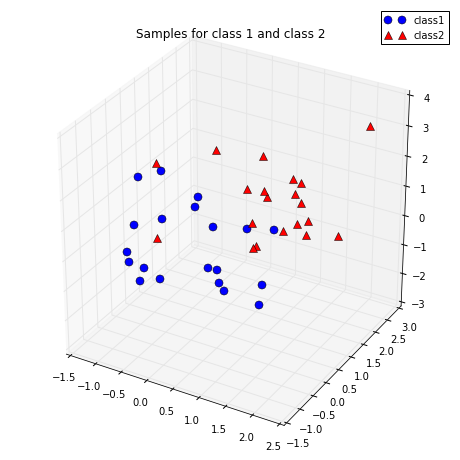

In [44]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import pandas as pd

np.random.seed(1)

#Class 1
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T

#Class 2
mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d') #1x1 grid, 1st subplot. 3D plot
plt.rcParams['legend.fontsize'] = 10
#alpha = measure of transparency
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:],
        'o', markersize=8, color='blue', alpha=1, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:],
        '^', markersize=8, alpha=1, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

Before performing PCA, we need to center the samples before performing SVD to find the eigenvectors and eigenvalues.

In [146]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1).T
df = pd.DataFrame({1:all_samples[:,0], 2:all_samples[:,1], 3:all_samples[:,2]})
df_means = df.mean(axis=0)

#Centering the data: 
df_centered = df - df_means

#Getting eigenvectors and eigenvalues
U, S, V = np.linalg.svd(df_centered / 40, full_matrices=0)
S = np.diag(S)

Reduce the dimensions of samples from 3 to 2.

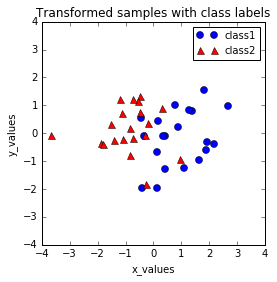

In [148]:
samples_reduced = df_centered.dot(V[0:2, :].T)
plt.plot(samples_reduced.iloc[:20,0], samples_reduced.iloc[:20, 1],
         'o', markersize=7, color='blue', alpha=1, label='class1')
plt.plot(samples_reduced.iloc[20:40, 0], samples_reduced.iloc[20:40, 1],
         '^', markersize=7, color='red', alpha=1, label='class2')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.title('Transformed samples with class labels')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Results from sklearn.

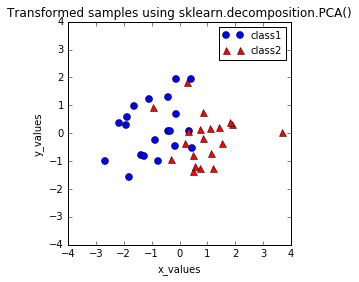

In [141]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)  #Number of eigenvectors to project to
sklearn_transf = sklearn_pca.fit_transform(df_centered)

plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1],
         'o', markersize=7, color='blue', alpha=1, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1],
         '^', markersize=7, color='red', alpha=1, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples using sklearn.decomposition.PCA()')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

We can observe that the two results are the same, and also that sklearn does PCA on the centered data. The variance of the projected points of $XV$ and $\tilde{X}V$ for centered matrix $\tilde{X}$ are the same. To see this for the first principal component if we were to start with $XV$

$$
\begin{align*}
\sigma_{1}^{2} &= \frac{1}{m}\left([x^{(i)}]^{T}v_{1} - \hat{x}^{T}v_{1}\right)^{2}\\
&= \frac{v_{1}^{T}}{m}\sum_{i = 1}^{m}(x^{(i)} - \hat{x})^{2}
\end{align*} 
$$

The last term is also the expression of variance of projected points for $\tilde{X}v_{1}$ since the mean of projected points is 0 by construction.